<a href="https://colab.research.google.com/github/Mund99/Medium_Writing/blob/main/MACD_Calculation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Download data from yahoo finance
ticker = 'TSLA'
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-01')

df = yf.download(ticker, start_date, end_date)
df.index = df.index.date

print(f"\nDataFrame Shape: {df.shape}\n")
display(df.info())
display(df.head())

[*********************100%%**********************]  1 of 1 completed


DataFrame Shape: (250, 6)

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


None

,Open,High,Low,Close,Adj Close,Volume
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


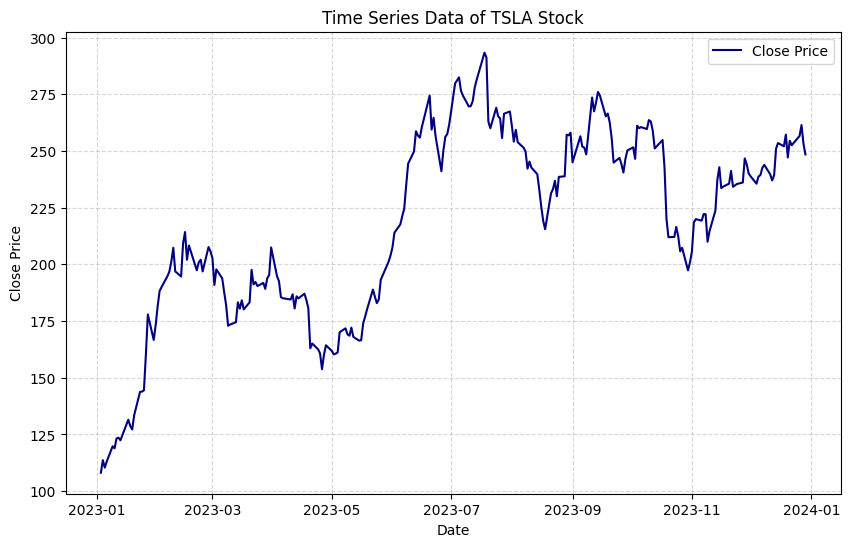

In [3]:
# Plot the close price
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price', color='navy')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of TSLA Stock')
plt.legend()
plt.grid(visible=True, alpha=0.5, linestyle='--')

plt.show()

# MACD

In [ ]:
# Calculate the 12-day Exponential Moving Average (EMA)
# The span parameter defines the period, and adjust=False ensures we use the EMA formula
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-day Exponential Moving Average (EMA)
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
# The MACD line is the difference between the 12-day EMA and the 26-day EMA
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate the Signal line
# The Signal line is a 9-day EMA of the MACD line
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
# The MACD Histogram is the difference between the MACD line and the Signal line
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

In [6]:
def calculate_MACD(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculates the MACD (Moving Average Convergence Divergence) and related indicators.

    Parameters:
        df (DataFrame): A pandas DataFrame containing at least a 'Close' column with closing prices.
        fast_period (int): The period for the fast EMA (default is 12).
        slow_period (int): The period for the slow EMA (default is 26).
        signal_period (int): The period for the signal line EMA (default is 9).

    Returns:
        DataFrame: A pandas DataFrame with the original data and added columns for MACD, Signal Line, and MACD Histogram.
    """

    df['EMA_fast'] = df['Close'].ewm(span=fast_period, adjust=False).mean()
    df['EMA_slow'] = df['Close'].ewm(span=slow_period, adjust=False).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']

    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

    return df

In [7]:
df = calculate_MACD(df, fast_period=12, slow_period=26, signal_period=9)

df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_fast,EMA_slow,MACD,Signal_Line,MACD_Histogram
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,108.099998,108.099998,0.000000,0.000000,0.000000
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,108.952306,108.510369,0.441937,0.088387,0.353550
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,109.165797,108.645897,0.519900,0.174690,0.345210
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,109.764905,108.972867,0.792038,0.298160,0.493878
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,111.304150,109.772655,1.531495,0.544827,0.986668


## Visualization Matplotlib


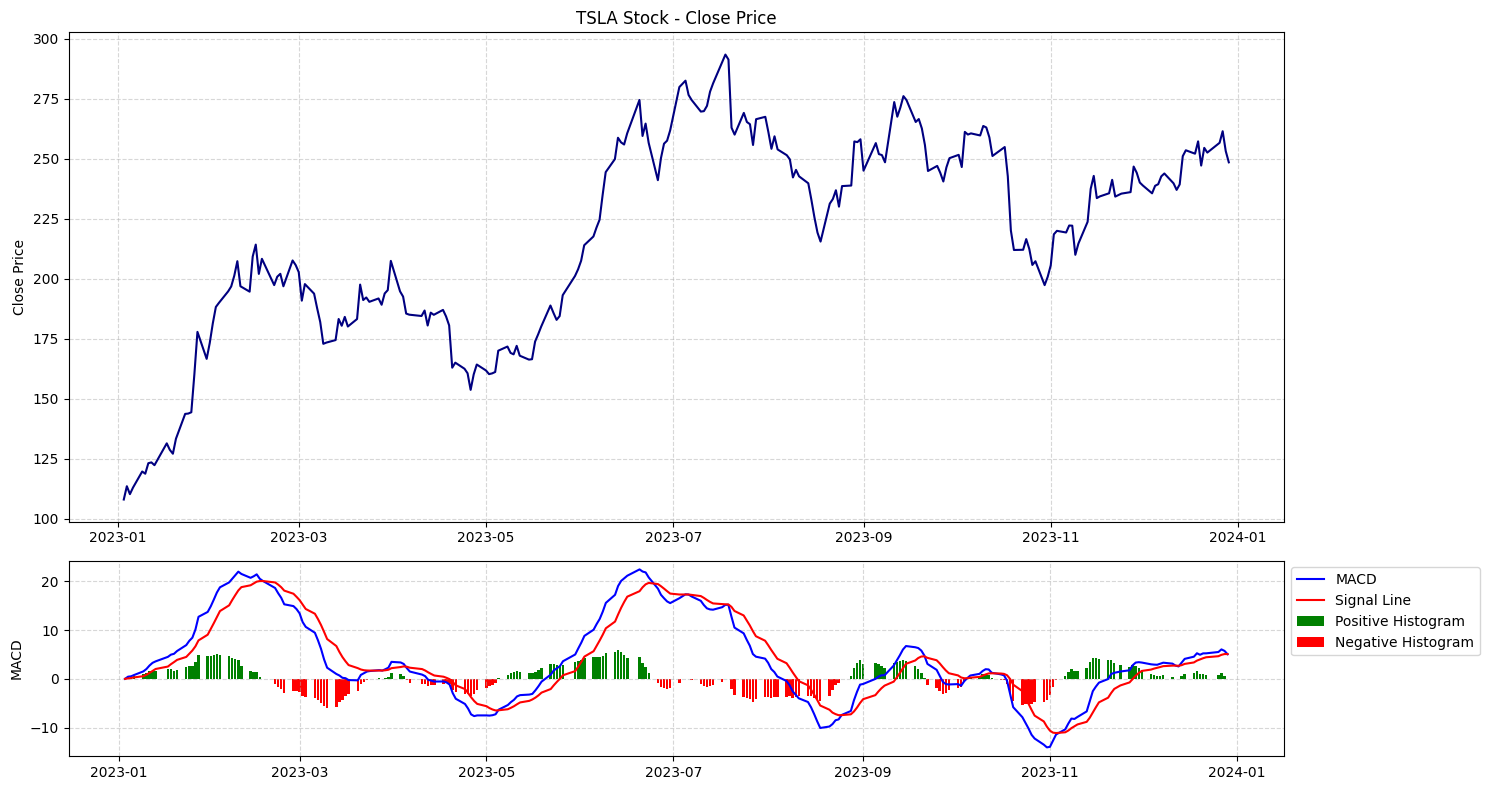

In [21]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2.5,1]})

# Plot close price
ax1.plot(df.index, df['Close'], label='Close Price', color='navy')
ax1.set_ylabel('Close Price')
ax1.set_title('TSLA Stock - Close Price')
ax1.grid(visible=True, alpha=0.5, linestyle='--')

# Plot MACD
ax2.plot(df.index, df['MACD'], label='MACD', color='blue')
ax2.plot(df.index, df['Signal_Line'], label='Signal Line', color='red')

pos_hist = df['MACD_Histogram'] > 0
neg_hist = df['MACD_Histogram'] <= 0
ax2.bar(df.index[pos_hist], df['MACD_Histogram'][pos_hist], label='Positive Histogram', color='green', alpha=1)
ax2.bar(df.index[neg_hist], df['MACD_Histogram'][neg_hist], label='Negative Histogram', color='red', alpha=1)

ax2.set_ylabel('MACD')
ax2.grid(visible=True, alpha=0.5, linestyle='--')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


## Visualization Plotly

In [22]:
# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],
                    vertical_spacing=0.15,  # Adjust vertical spacing between subplots
                    subplot_titles=("Candlestick Chart", "MACD"))  # Add subplot titles


# Subplot 1: Plot candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='#00cc96',  # Green for increasing
    decreasing_line_color='#ff3e3e',  # Red for decreasing
    showlegend=False
), row=1, col=1)  # Specify row and column indices


# Subplot 2: Plot MACD
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['MACD'],
        mode='lines',
        name='MACD',
        line=dict(color='blue')
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Signal_Line'],
        mode='lines',
        name='Signal Line',
        line=dict(color='red')
    ),
    row=2, col=1
)

# Plot MACD Histogram with different colors for positive and negative values
histogram_colors = ['green' if val >= 0 else 'red' for val in df['MACD_Histogram']]

fig.add_trace(
    go.Bar(
        x=df.index,
        y=df['MACD_Histogram'],
        name='MACD Histogram',
        marker_color=histogram_colors
    ),
    row=2, col=1
)

# Update layout with zoom and pan tools enabled
layout = go.Layout(
    title='TSLA Candlestick Chart and MACD Subplots',
    title_font=dict(size=25),  # Adjust title font size
    plot_bgcolor='#f2f2f2',  # Light gray background
    height=800,
    width=1500,
    xaxis_rangeslider=dict(visible=True, thickness=0.03),
)

# Update the layout of the entire figure
fig.update_layout(layout)
fig.update_yaxes(fixedrange=False, row=1, col=1)
fig.update_yaxes(fixedrange=True, row=2, col=1)
fig.update_xaxes(type='category', row=1, col=1)
fig.update_xaxes(type='category', nticks=10, row=2, col=1)

fig.show()